In [15]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("C_Adult.csv")

In [17]:
data = data.join(pd.get_dummies(data.education)).drop(['education'],axis = 1)
data = data.join(pd.get_dummies(data.workclass)).drop(['workclass'],axis = 1)
data = data.join(pd.get_dummies(data.marital_status)).drop(['marital_status'],axis = 1)
data = data.join(pd.get_dummies(data.occupation)).drop(['occupation'],axis = 1)
data = data.join(pd.get_dummies(data.relationship)).drop(['relationship'],axis = 1)
data = data.join(pd.get_dummies(data.race)).drop(['race'],axis = 1)
data = data.join(pd.get_dummies(data.gender)).drop(['gender'],axis = 1)
data = data.join(pd.get_dummies(data.native_country)).drop(['native_country'],axis = 1)

In [18]:
data

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,10th,11th,12th,...,Portugal,Puerto_Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United_States,Vietnam,Yugoslavia
0,25,226802,7,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,198693,6,0,0,30,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45218,40,154374,9,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45219,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45220,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
from sklearn.model_selection import train_test_split

x = data.drop(['income'],axis = 1)
y = data['income']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=11)

In [21]:
train_data = x_train.join(y_train)

In [22]:
train_data

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,10th,11th,12th,1st_4th,...,Puerto_Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United_States,Vietnam,Yugoslavia,income
43143,23,168009,6,0,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
16827,32,120426,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
17114,33,189843,4,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
21760,41,227890,10,0,0,46,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
12615,25,158033,9,0,0,65,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32081,74,192413,15,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
7259,25,269004,11,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
21584,24,222993,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
36543,27,224105,9,7298,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1


In [23]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

Text(0, 0.5, 'accuracy')

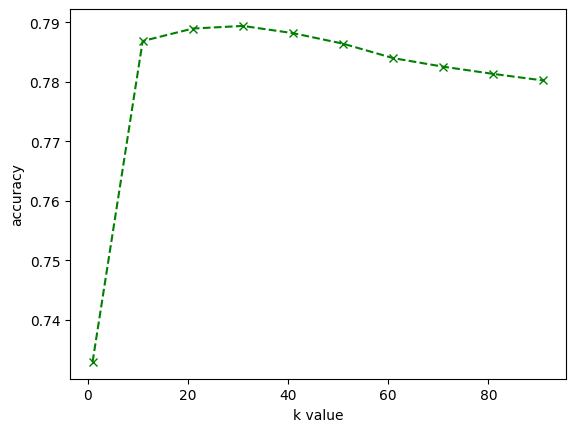

In [24]:
accuracy = []
for i in range(1,100,10):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1,100,10), accuracy, color = 'green', linestyle = 'dashed', marker = 'x')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [25]:
knn = KNeighborsClassifier(n_neighbors = 20).fit(x_train,y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7876174682144831